# TP3

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - María Fabiana Cid
#### - Yessika Arrieta

TP3▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material TPs/TP3

### Images a partir del template Material_TPs/TP3/template

1. **(4 puntos)** Obtener una detección del logo en cada imagen sin falsos positivos.
2. **(4 puntos)** Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo template del ítem 1.
3. **(2 puntos)** Generalizar el algoritmo del ítem 2 para todas las imágenes. 

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [10]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 1. **(4 puntos)** Obtener una detección del logo en cada imagen sin falsos positivos.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def template_matching(image_path, template_path, method="cv.TM_CCOEFF_NORMED", 
                      canny_threshold1=100, canny_threshold2=200,thickness=10, 
                      max_scale=3, min_scale=0.3, n_scales=50):
    """
    Realiza la búsqueda de una plantilla en una imagen usando técnicas de Template Matching
    con escalado y detección de bordes de Canny.

    Parameters:
    image_path (str): Ruta de la imagen en la cual se realizará la búsqueda.
    template_path (str): Ruta de la imagen de la plantilla.
    method (str): Método de OpenCV para template matching (por defecto: cv.TM_CCOEFF_NORMED).
    canny_threshold1 (int): Primer umbral para la detección de bordes con Canny.
    canny_threshold2 (int): Segundo umbral para la detección de bordes con Canny.
    thickness (int): Grosor del rectángulo dibujado sobre el match encontrado.
    max_scale (float): Escala máxima para redimensionar la plantilla.
    min_scale (float): Escala mínima para redimensionar la plantilla.
    n_scales (int): Número de escalas intermedias.

    Returns:
    None
    """
    
    # Cargar imagen y plantilla
    image = cv.imread(image_path)
    template = cv.imread(template_path, 0)  # La plantilla se lee en escala de grises
    
    if image is None or template is None:
        raise ValueError("No se pudo cargar la imagen o la plantilla.")
    
    # Convertir la imagen a RGB para la salida visual
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    # Detección de bordes con Canny para la plantilla
    template_edges = cv.Canny(template, canny_threshold1, canny_threshold2)
    
    # Generar escalas
    scales = np.linspace(max_scale, min_scale, n_scales)
    
    best_val = -np.inf  # Para almacenar el mejor valor de coincidencia
    best_bbox = None  # Para almacenar la mejor caja delimitadora

    method = eval(method)
    
    # Iterar sobre las diferentes escalas
    for scale in scales:
        # Redimensionar la plantilla a la escala actual
        scaled_template = cv.resize(template_edges, None, fx=scale, fy=scale)

        # Verificar que la plantilla escalada no sea más grande que la imagen
        if scaled_template.shape[0] > image.shape[0] or scaled_template.shape[1] > image.shape[1]:
            print(f"Plantilla en escala {scale:.2f} es más grande que la imagen. Se omite.")
            continue
        
        # Aplicar detección de bordes Canny en la imagen
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image_edges = cv.Canny(image_gray, canny_threshold1, canny_threshold2)
        
        # Aplicar template matching
        result = cv.matchTemplate(image_edges, scaled_template, method)
        
        # Encontrar los valores mínimos y máximos de coincidencia
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
        
        # Decidir qué valor usar dependiendo del método
        if method in ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:#[cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            match_value = min_val
            top_left = min_loc
        else:
            match_value = max_val
            top_left = max_loc
        
        # Actualizar si se encuentra una mejor coincidencia
        if match_value > best_val:
            best_val = match_value
            w,h = scaled_template.shape[::-1]
            best_bbox = (top_left[0], top_left[1], top_left[0] + w, top_left[1] + h)

    # Dibujar el mejor match encontrado
    if best_bbox:
        top_left = (best_bbox[0], best_bbox[1])
        bottom_right = (best_bbox[2], best_bbox[3])
        thickness = int(max(image.shape) / 180)
        cv.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), thickness) #thickness)
    
    # Mostrar los resultados
    plt.figure(figsize=(10, 5))

    # Resultado visual del Template Matching
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title(f"Best Match - Value: {best_val:.2f}")
    plt.xticks([]), plt.yticks([])

    # Detección de bordes de la imagen original
    plt.subplot(122)
    plt.imshow(image_edges, cmap='gray')
    plt.title("Edge Detection")
    plt.xticks([]), plt.yticks([])

    plt.show() 





Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.94 es más grande que la imagen. Se omite.
Plantilla en escala 2.89 es más grande que la imagen. Se omite.
Plantilla en escala 2.83 es más grande que la imagen. Se omite.
Plantilla en escala 2.78 es más grande que la imagen. Se omite.
Plantilla en escala 2.72 es más grande que la imagen. Se omite.
Plantilla en escala 2.67 es más grande que la imagen. Se omite.
Plantilla en escala 2.61 es más grande que la imagen. Se omite.
Plantilla en escala 2.56 es más grande que la imagen. Se omite.
Plantilla en escala 2.50 es más grande que la imagen. Se omite.
Plantilla en escala 2.45 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.28 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande que la imagen. Se omite.
Plantilla en escala 2.17 es más grande q

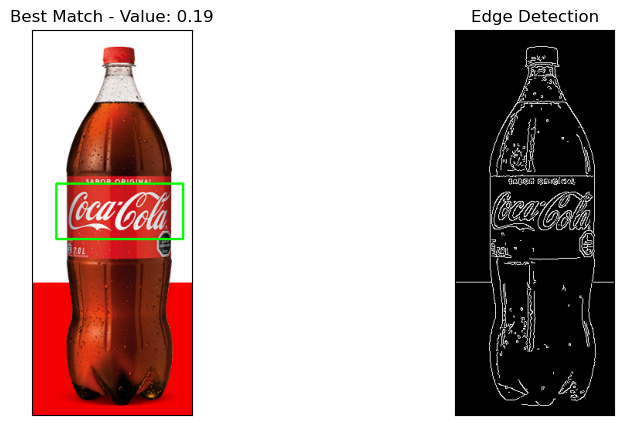

Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.95 es más grande que la imagen. Se omite.
Plantilla en escala 2.90 es más grande que la imagen. Se omite.
Plantilla en escala 2.85 es más grande que la imagen. Se omite.
Plantilla en escala 2.80 es más grande que la imagen. Se omite.
Plantilla en escala 2.74 es más grande que la imagen. Se omite.
Plantilla en escala 2.69 es más grande que la imagen. Se omite.
Plantilla en escala 2.64 es más grande que la imagen. Se omite.
Plantilla en escala 2.59 es más grande que la imagen. Se omite.
Plantilla en escala 2.54 es más grande que la imagen. Se omite.
Plantilla en escala 2.49 es más grande que la imagen. Se omite.
Plantilla en escala 2.44 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.29 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande q

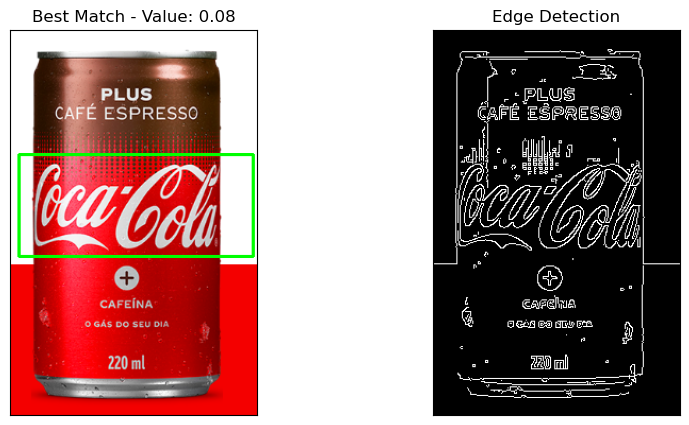

Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.94 es más grande que la imagen. Se omite.
Plantilla en escala 2.89 es más grande que la imagen. Se omite.
Plantilla en escala 2.83 es más grande que la imagen. Se omite.
Plantilla en escala 2.78 es más grande que la imagen. Se omite.
Plantilla en escala 2.72 es más grande que la imagen. Se omite.
Plantilla en escala 2.67 es más grande que la imagen. Se omite.
Plantilla en escala 2.61 es más grande que la imagen. Se omite.
Plantilla en escala 2.56 es más grande que la imagen. Se omite.
Plantilla en escala 2.50 es más grande que la imagen. Se omite.
Plantilla en escala 2.45 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.28 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande que la imagen. Se omite.
Plantilla en escala 2.17 es más grande q

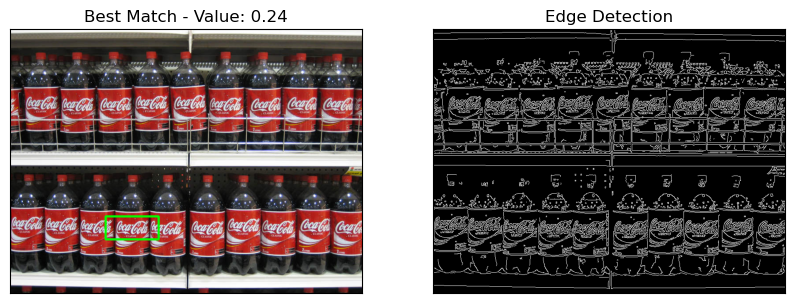

Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.94 es más grande que la imagen. Se omite.
Plantilla en escala 2.89 es más grande que la imagen. Se omite.
Plantilla en escala 2.83 es más grande que la imagen. Se omite.
Plantilla en escala 2.78 es más grande que la imagen. Se omite.
Plantilla en escala 2.72 es más grande que la imagen. Se omite.
Plantilla en escala 2.67 es más grande que la imagen. Se omite.
Plantilla en escala 2.61 es más grande que la imagen. Se omite.
Plantilla en escala 2.56 es más grande que la imagen. Se omite.
Plantilla en escala 2.50 es más grande que la imagen. Se omite.
Plantilla en escala 2.45 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.28 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande que la imagen. Se omite.
Plantilla en escala 2.17 es más grande q

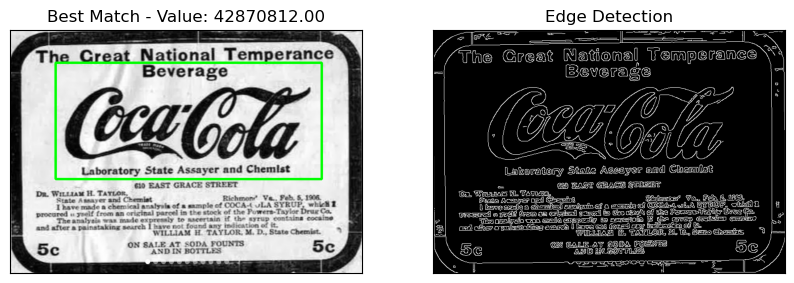

Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.94 es más grande que la imagen. Se omite.
Plantilla en escala 2.89 es más grande que la imagen. Se omite.
Plantilla en escala 2.83 es más grande que la imagen. Se omite.
Plantilla en escala 2.78 es más grande que la imagen. Se omite.
Plantilla en escala 2.72 es más grande que la imagen. Se omite.
Plantilla en escala 2.67 es más grande que la imagen. Se omite.
Plantilla en escala 2.61 es más grande que la imagen. Se omite.
Plantilla en escala 2.56 es más grande que la imagen. Se omite.
Plantilla en escala 2.50 es más grande que la imagen. Se omite.
Plantilla en escala 2.45 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.28 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande que la imagen. Se omite.
Plantilla en escala 2.17 es más grande q

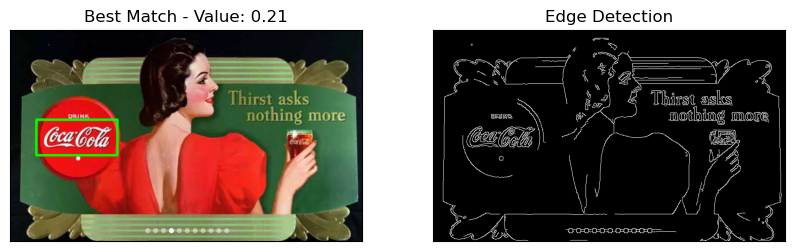

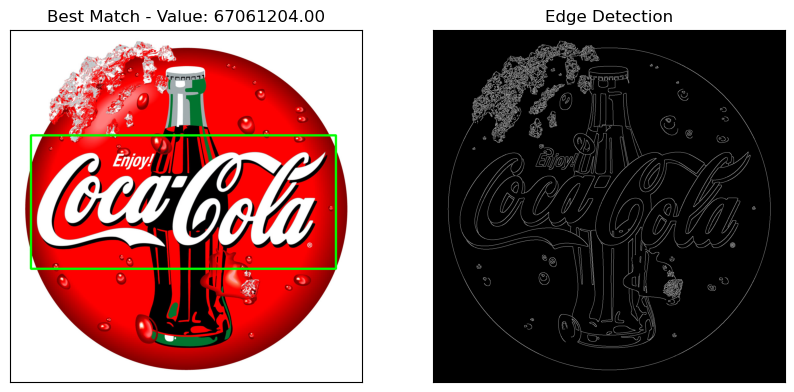

Plantilla en escala 3.00 es más grande que la imagen. Se omite.
Plantilla en escala 2.94 es más grande que la imagen. Se omite.
Plantilla en escala 2.89 es más grande que la imagen. Se omite.
Plantilla en escala 2.83 es más grande que la imagen. Se omite.
Plantilla en escala 2.78 es más grande que la imagen. Se omite.
Plantilla en escala 2.72 es más grande que la imagen. Se omite.
Plantilla en escala 2.67 es más grande que la imagen. Se omite.
Plantilla en escala 2.61 es más grande que la imagen. Se omite.
Plantilla en escala 2.56 es más grande que la imagen. Se omite.
Plantilla en escala 2.50 es más grande que la imagen. Se omite.
Plantilla en escala 2.45 es más grande que la imagen. Se omite.
Plantilla en escala 2.39 es más grande que la imagen. Se omite.
Plantilla en escala 2.34 es más grande que la imagen. Se omite.
Plantilla en escala 2.28 es más grande que la imagen. Se omite.
Plantilla en escala 2.23 es más grande que la imagen. Se omite.
Plantilla en escala 2.17 es más grande q

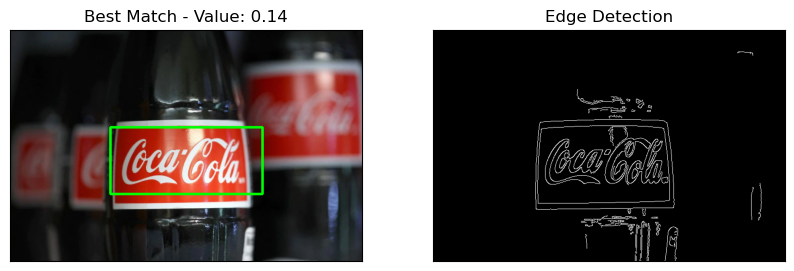

In [2]:
template_matching('./images/coca_logo_1.png', './template/pattern.png')
template_matching('./images/coca_logo_2.png', './template/pattern.png',min_scale=0.5)
template_matching('./images/coca_multi.png' , './template/pattern.png',method='cv.TM_CCORR_NORMED')
template_matching('./images/coca_retro_1.png', './template/pattern.png', method='cv.TM_CCOEFF')
template_matching('./images/coca_retro_2.png', './template/pattern.png',)
template_matching('./images/COCA-COLA-LOGO.jpg', './template/pattern.png',method='cv.TM_CCOEFF')
template_matching('./images/logo_1.png', './template/pattern.png')


## 2. **(4 puntos)** Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo template del ítem 1.

In [13]:
def multi_template_matching(template_path, image_path, scale=1, method='cv.TM_CCOEFF', canny_threshold1=100, canny_threshold2=200, threshold=0.8):
    """
    Detect multiple instances of a template in the given image using template matching.

    Parameters:
    template_path (str): The path to the template image.
    image_path (str): The path to the image in which to search for the template.
    scale (float): The scale factor to resize the template.
    method (str): The template matching method to use.
    canny_threshold1 (int): The first threshold for Canny edge detection.
    canny_threshold2 (int): The second threshold for Canny edge detection.
    threshold (float): Minimum similarity threshold for a detection to be considered valid.

    Returns:
    bboxes (list): List of bounding boxes around detected templates.
    """

    # Cargar las imágenes
    template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
    image = cv.imread(image_path)
    
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Aplicar detección de bordes Canny al template y a la imagen
    template_edges = cv.Canny(template, threshold1=canny_threshold1, threshold2=300)
    image_edges = cv.Canny(image, threshold1=canny_threshold1, threshold2=canny_threshold2)

    # Redimensionar el template según la escala
    resized_template = cv.resize(template_edges, None, fx=scale, fy=scale)
    w, h = resized_template.shape[::-1]

    # Verificar si el template redimensionado es más grande que la imagen
    if resized_template.shape[0] > image_edges.shape[0] or resized_template.shape[1] > image_edges.shape[1]:
        raise ValueError("Resized template is larger than the image")


    method = eval(method)

    # Aplicar coincidencia de plantillas
    result = cv.matchTemplate(image_edges, resized_template, method)

    # Encontrar los valores mínimos y máximos y sus ubicaciones
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    # Filtramos las coincidencias que superan el umbral
    yloc, xloc = np.where(result >= threshold * max_val)

    # Creamos una lista de bounding boxes
    bboxes = []
    for (x, y) in zip(xloc, yloc):
        bboxes.append([x, y, x + w, y + h, max_val])

    # Aplicamos supresión de no máximos para evitar detecciones superpuestas
    bboxes = np.array(bboxes)
    if len(bboxes) > 0:
        bboxes = non_max_suppression_fast(bboxes, overlapThresh=0.3)

    # Dibujamos los rectángulos en la imagen original
    for (x1, y1, x2, y2, _) in bboxes:
        cv.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Mostrar la imagen con las detecciones
    plt.figure(figsize=(12, 6))
    plt.imshow(img_rgb)
    plt.title("Detected Templates")
    plt.axis("off")
    plt.show()

    return bboxes

def non_max_suppression_fast(boxes, overlapThresh=0.3):
    if len(boxes) == 0:
        return []

    # Inicializamos las listas de coordenadas
    pick = []

    # Extraemos las coordenadas
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # Calculamos el área de las cajas
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    
    # Creamos un arreglo de índices
    idxs = np.argsort(boxes[:, 4])  # Ordenar por el valor de coincidencia

    while len(idxs) > 0:
        # Tomamos el último índice
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # Coordenadas de la caja de la mejor coincidencia
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # Calculamos el ancho y alto de la intersección
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # Calculamos la relación de intersección sobre la unión
        overlap = (w * h) / area[idxs[:last]]

        # Eliminamos todas las cajas que tienen un umbral de intersección superior
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")





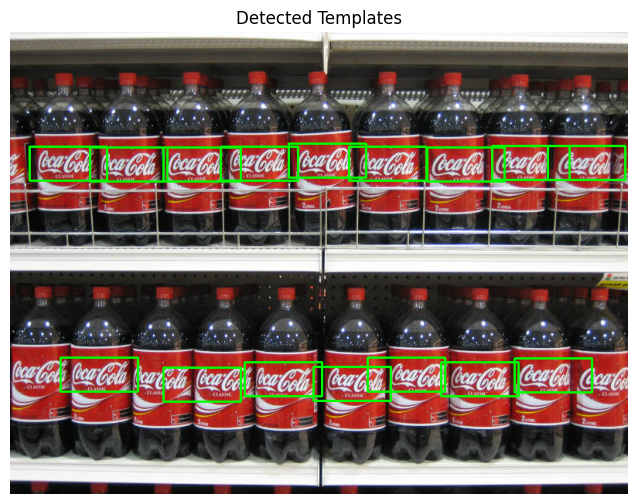

array([[198, 434, 298, 478,   0],
       [272, 148, 372, 192,   0],
       [198, 149, 298, 193,   0],
       [103, 149, 203, 193,   0],
       [438, 148, 538, 192,   0],
       [462, 421, 562, 465,   0],
       [ 25, 148, 125, 192,   0],
       [695, 147, 795, 191,   0],
       [539, 149, 639, 193,   0],
       [ 65, 421, 165, 465,   0],
       [623, 147, 723, 191,   0],
       [360, 144, 460, 188,   0],
       [392, 433, 492, 477,   0],
       [303, 427, 403, 471,   0],
       [557, 427, 657, 471,   0],
       [652, 422, 752, 466,   0]])

In [14]:
multi_template_matching('./template/pattern.png','./images/coca_multi.png' ,scale=0.25,method='cv.TM_CCORR_NORMED', canny_threshold1=100, canny_threshold2=200, threshold=0.76)

## 3. **(2 puntos)** Generalizar el algoritmo del item 2 para todas las imágenes.

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Diccionario de métodos de coincidencia seguros
METHODS = {
    "cv.TM_CCOEFF": cv.TM_CCOEFF,
    "cv.TM_CCOEFF_NORMED": cv.TM_CCOEFF_NORMED,
    "cv.TM_CCORR": cv.TM_CCORR,
    "cv.TM_CCORR_NORMED": cv.TM_CCORR_NORMED,
    "cv.TM_SQDIFF": cv.TM_SQDIFF,
    "cv.TM_SQDIFF_NORMED": cv.TM_SQDIFF_NORMED
}

def auto_canny(image, sigma=0.33):
    """Función para calcular los umbrales de Canny automáticamente"""
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)
    return edged

def multi_template_matching_images(template_path, image_path, scales=[1], method='cv.TM_CCOEFF', threshold=0.95):
    """
    Generalized multi-scale template matching algorithm for all types of images.

    Parameters:
    template_path (str): Path to the template image.
    image_path (str): Path to the image in which to search for the template.
    scales (list): List of scales to resize the template for multi-scale detection.
    method (str): Template matching method to use.
    threshold (float): Minimum similarity threshold for a detection to be considered valid.

    Returns:
    bboxes (list): List of bounding boxes around detected templates.
    """

    # Cargar las imágenes
    template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
    image = cv.imread(image_path)

    # Verificar si la imagen es en color y convertirla a escala de grises si es necesario
    if len(image.shape) == 3:  # Imagen en color
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = image

    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Aplicar detección de bordes Canny automática al template y a la imagen
    template_edges = auto_canny(template)
    image_edges = auto_canny(gray_image)

    bboxes = []

    for scale in scales:
        # Redimensionar el template según la escala
        resized_template = cv.resize(template_edges, None, fx=scale, fy=scale)
        w, h = resized_template.shape[::-1]

        # Verificar si el template redimensionado es más grande que la imagen
        if resized_template.shape[0] > image_edges.shape[0] or resized_template.shape[1] > image_edges.shape[1]:
            continue  # Saltar si el template redimensionado es más grande que la imagen

        # Convertir el método de string a método OpenCV usando el diccionario seguro
        if method not in METHODS:
            raise ValueError(f"Método {method} no reconocido. Usa uno de los siguientes: {list(METHODS.keys())}")
        method_opencv = METHODS[method]

        # Aplicar coincidencia de plantillas
        result = cv.matchTemplate(image_edges, resized_template, method_opencv)

        # Filtrar las coincidencias que superan el umbral
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
        yloc, xloc = np.where(result >= threshold * max_val)

        # Crear una lista de bounding boxes
        for (x, y) in zip(xloc, yloc):
            bboxes.append([x, y, x + w, y + h, max_val])

    # Aplicar supresión de no máximos para evitar detecciones superpuestas
    bboxes = np.array(bboxes)
    if len(bboxes) > 0:
        bboxes = non_max_suppression_fast(bboxes, overlapThresh=0.3)

    # Dibujar los rectángulos en la imagen original
    for (x1, y1, x2, y2, _) in bboxes:
        cv.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Mostrar la imagen con las detecciones
    plt.figure(figsize=(12, 6))
    plt.imshow(img_rgb)
    plt.title("Detected Templates")
    plt.axis("off")
    plt.show()

    return bboxes



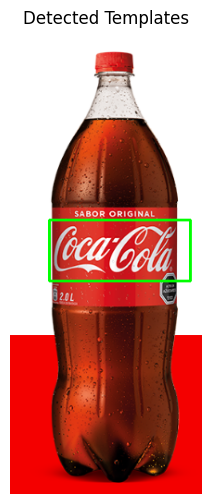

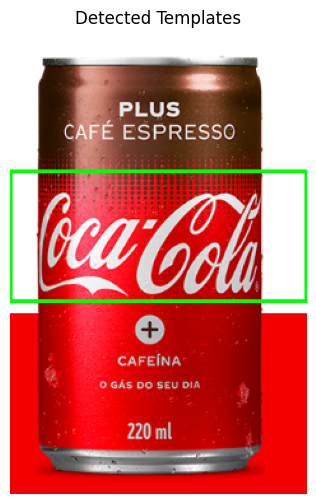

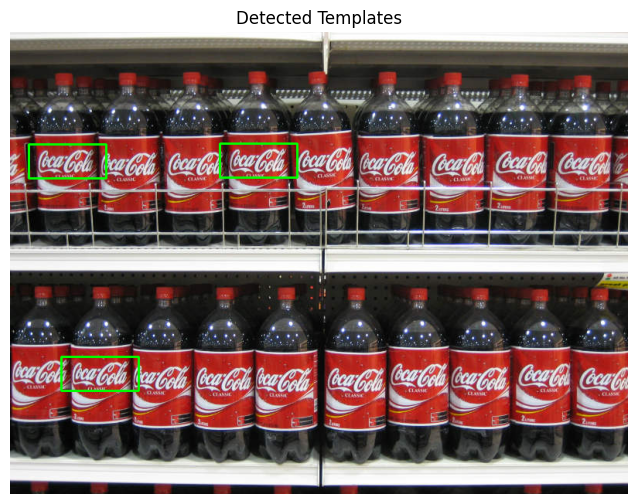

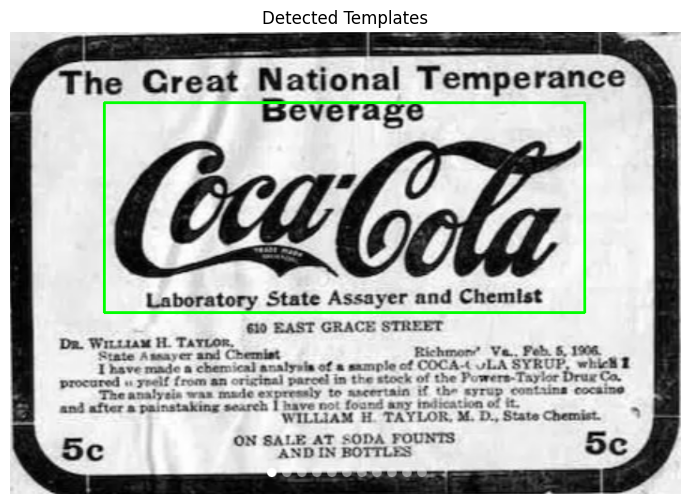

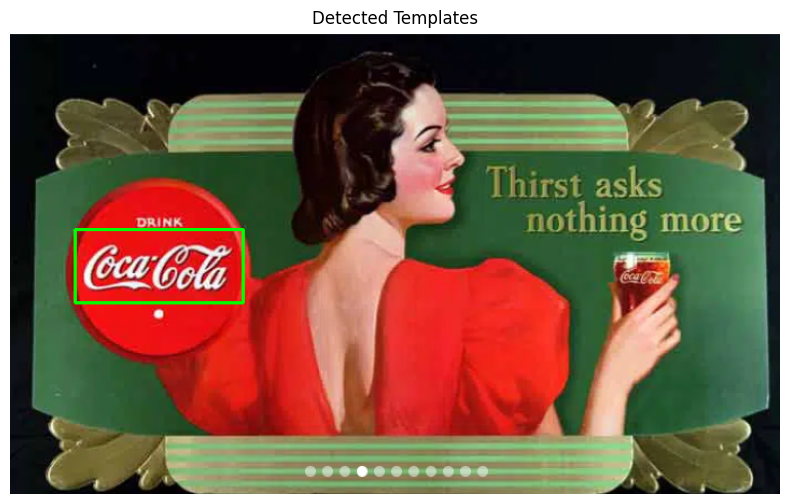

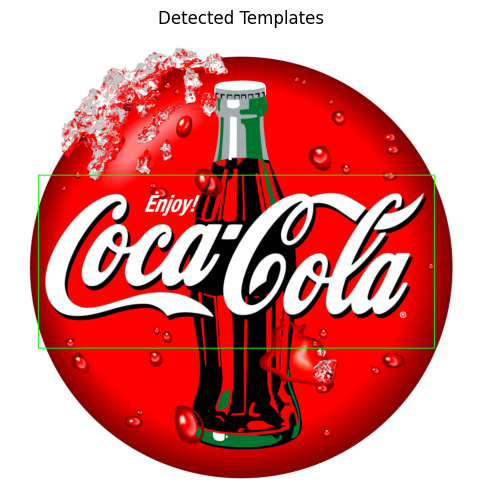

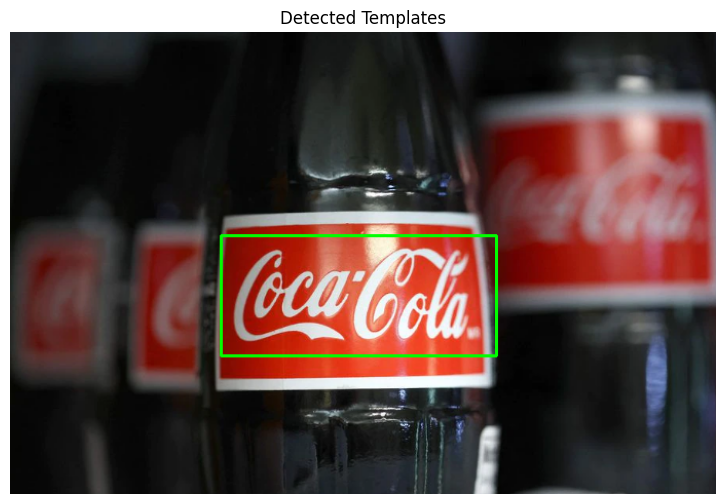

array([[     205,      198,      473,      315, 10474995]])

In [16]:
multi_template_matching_images('./template/pattern.png','./images/coca_logo_1.png',scales=[0.38],method='cv.TM_CCOEFF_NORMED')
multi_template_matching_images('./template/pattern.png', './images/coca_logo_2.png', scales=[0.58], method='cv.TM_CCOEFF', threshold=0.60)
multi_template_matching_images('./template/pattern.png','./images/coca_multi.png' ,scales=[0.25],method='cv.TM_CCOEFF_NORMED')
multi_template_matching_images('./template/pattern.png', 'images/coca_retro_1.png', scales=[1.28], method='cv.TM_CCOEFF_NORMED', threshold=0.85)
multi_template_matching_images('./template/pattern.png','./images/coca_retro_2.png',scales=[0.39],method='cv.TM_CCOEFF')
multi_template_matching_images('./template/pattern.png', './images/COCA-COLA-LOGO.jpg', scales=[2.97], method='cv.TM_CCOEFF_NORMED', threshold=0.85)
multi_template_matching_images('./template/pattern.png', './images/logo_1.png', scales=[0.67], method='cv.TM_CCOEFF', threshold=0.95)

Conclusiones: Para poder detectar los logos en las imágenes a partir del template otorgado, observamos que existían determinadas características que hicieron necesario un pre-procesamiento antes de aplicar Template Matching.
 Primero, observamos diferencias entre los fondos de las imágenes y el template. Para resolverlo,  aplicamos el detector de bordes Canny tanto a las imágenes como al template.  
Segundo, detectamos logos de diversos tamaños en las imágenes  e incluso cambios de curvatura. Por este motivo, generamos  múltiples templates variando la escala y la proporción para poder matchearlos.
Podemos concluir  que  la técnica Template matching es útil para tareas simples y objetos con poca variación, pero no es robusto frente a cambios de escala, rotación, curvatura y fondo. Para resolver estas limitaciones, requerimos realizar los pre-procesamientos mencionados. 
Para mejorar los resultados en imágenes con condiciones variables, se podría recurrir a técnicas como SIFT, SURF, ORB o CNN, que son invariables a muchos de estos cambios.